In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
import pandas as pd


url = 'https://docs.google.com/spreadsheets/d/1DkdhWMrVjtflQfmCIKl8hCjSlIxph1L42_fgyFo0QPs/export?format=csv&gid=1477722452'
# Загрузка данных
df_train = pd.read_csv(url)

print(df_train)

        ID  Order Date     Class       Region Sub-Category     Sales
0      646  30/12/2018  Стандарт         Урал   Appliances  37229,08
1      907  30/12/2018  Стандарт  Владивосток    Bookcases  20994,61
2      908  30/12/2018  Стандарт  Владивосток       Phones  42133,86
3      909  30/12/2018  Стандарт  Владивосток      Binders     10612
4     1297  30/12/2018  Стандарт   Калиниград      Binders  28781,13
...    ...         ...       ...          ...          ...       ...
9795  1760  05/01/2015  Стандарт  Владивосток          Art  8639,472
9796   740  04/01/2015  Стандарт         Урал       Labels  15246,05
9797   741  04/01/2015  Стандарт         Урал      Storage  20415,81
9798   742  04/01/2015  Стандарт         Урал      Binders  4559,085
9799  7981  03/01/2015  Стандарт         Урал        Paper  11726,47

[9800 rows x 6 columns]


In [196]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            9800 non-null   int64 
 1   Order Date    9800 non-null   object
 2   Class         9800 non-null   object
 3   Region        9800 non-null   object
 4   Sub-Category  9800 non-null   object
 5   Sales         9800 non-null   object
dtypes: int64(1), object(5)
memory usage: 459.5+ KB


In [197]:
df_train.isnull().sum()

ID              0
Order Date      0
Class           0
Region          0
Sub-Category    0
Sales           0
dtype: int64

In [198]:
df_train['Order Date'] = pd.to_datetime(df_train['Order Date'], format='%d/%m/%Y')
df_train['Sales'] = df_train['Sales'].astype(str).str.replace(',', '.').astype(float)

In [199]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            9800 non-null   int64         
 1   Order Date    9800 non-null   datetime64[ns]
 2   Class         9800 non-null   object        
 3   Region        9800 non-null   object        
 4   Sub-Category  9800 non-null   object        
 5   Sales         9800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 459.5+ KB


In [200]:
# Вспомогательная функция для фильтрации по дате
def filter_by_time_period(df, date_column, years=None, months=None, weeks=None, days=None):
    df[date_column] = pd.to_datetime(df[date_column])
    
    if any([years, months, weeks, days]):
        last_date = df[date_column].max()
        
        if years is not None:
            past_date = last_date - pd.DateOffset(years=years)
        elif months is not None:
            past_date = last_date - pd.DateOffset(months=months)
        elif weeks is not None:
            past_date = last_date - pd.DateOffset(weeks=weeks)
        elif days is not None:
            past_date = last_date - pd.DateOffset(days=days)
        
        return df[df[date_column] >= past_date]
    
    return df


In [201]:
#Функция будет возвращать топ-4 категорий и их долю за указанный период
def top_categories_over_time(df, category_column, date_column, years=None, months=None, weeks=None, days=None):
    recent_data = filter_by_time_period(df, date_column, years, months, weeks, days)
    
    counts = recent_data[category_column].value_counts()
    top_categories = counts.head(4).reset_index()
    top_categories.columns = ['Top-Category', 'count']
    
    total_count = recent_data.shape[0]
    top_categories['percent'] = np.around((top_categories['count'] / total_count) * 100, 1) if total_count > 0 else 0
    
    return top_categories

In [202]:
# Функция построения круговых диаграмм за указанный период
def pie_diagram(df: pd.DataFrame, column: str, date_column: str, title: str, years=None, months=None, weeks=None, days=None):
    recent_data = filter_by_time_period(df, date_column, years, months, weeks, days)

    category_counts = recent_data[column].value_counts()

    plt.figure(figsize=(5, 5), dpi=200)
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',
            colors=plt.cm.Paired.colors, textprops={'fontsize': 4}, labeldistance=1.02)

    plt.gca().set(aspect="equal")
    plt.title(title, fontsize=10)

# **Какие подгруппы товаров наиболее часто покупают за все время продаж?**

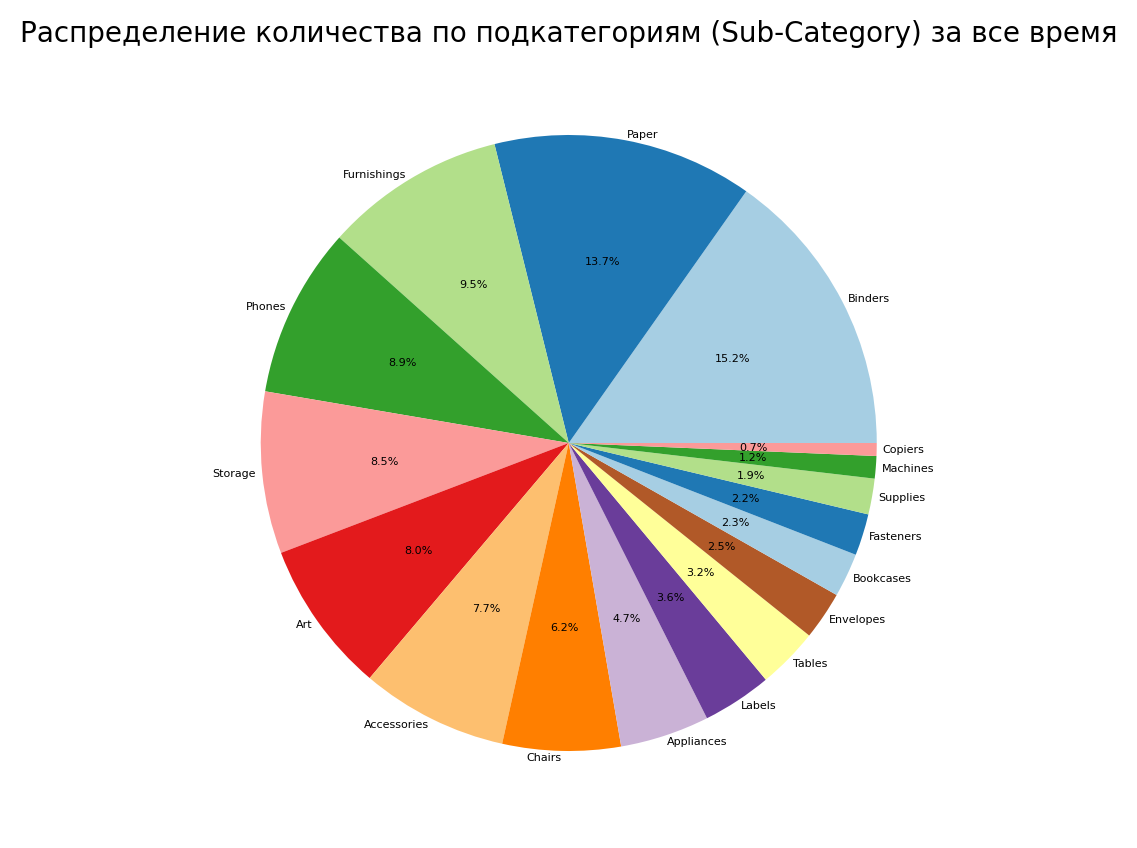

In [203]:

pie_diagram(df_train, 'Sub-Category', 'Order Date', 'Распределение количества по подкатегориям (Sub-Category) за все время')

In [204]:
top_categories_of_all_time = top_categories_over_time(df_train, 'Sub-Category', 'Order Date')
top_categories_of_all_time

,Top-Category,count,percent
0,Binders,1492,15.2
1,Paper,1338,13.7
2,Furnishings,931,9.5
3,Phones,876,8.9


# **ИТОГ**
## *Топ 4 категории за вс время это Binders, Paper, Furnishings, Phones*

# **Какие подгруппы товаров наиболее часто покупают за последние 2 года?**

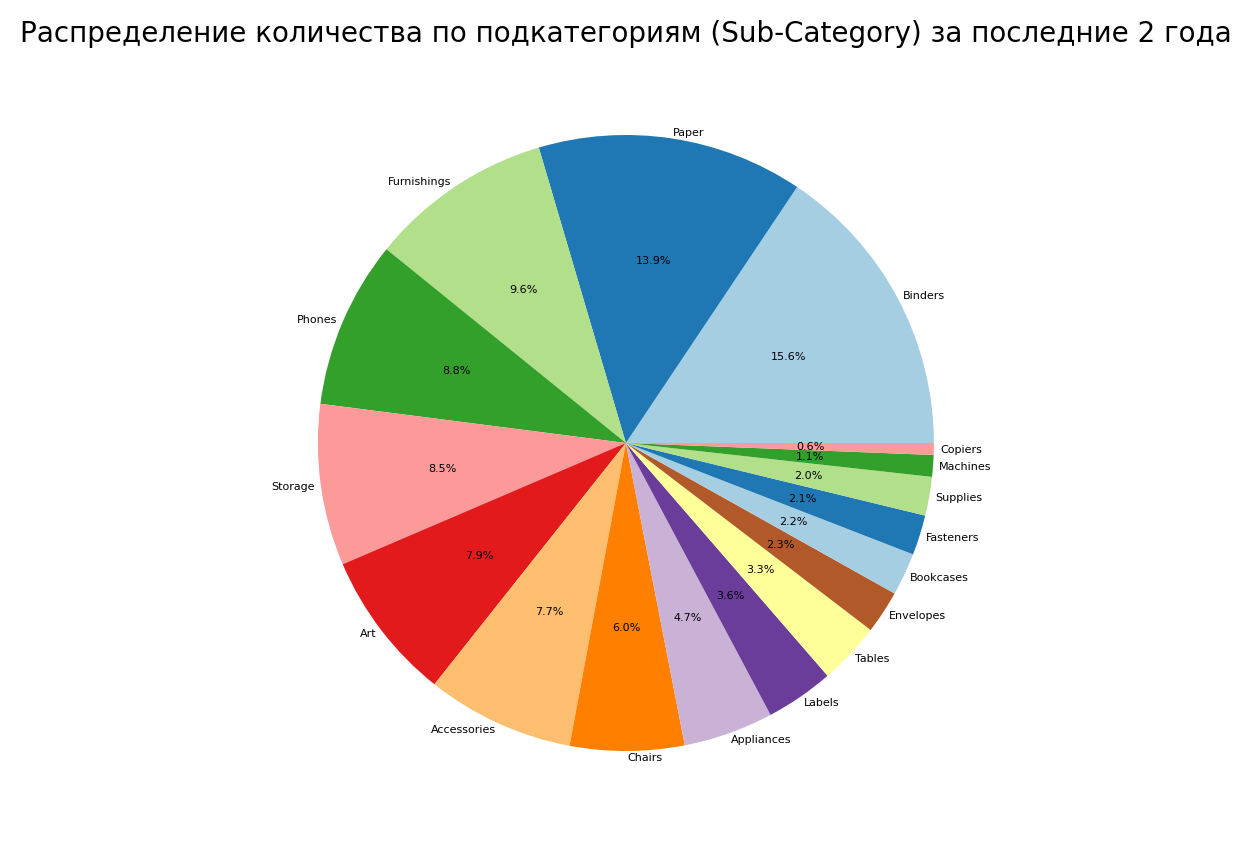

In [205]:
pie_diagram(df_train, 'Sub-Category', 'Order Date', 'Распределение количества по подкатегориям (Sub-Category) за последние 2 года', 2)

In [206]:

top_subcategories_two_years = top_categories_over_time(df_train, 'Sub-Category', 'Order Date', 2)
top_subcategories_two_years

,Top-Category,count,percent
0,Binders,907,15.6
1,Paper,810,13.9
2,Furnishings,558,9.6
3,Phones,511,8.8


# **ИТОГ**
## *Топ 4 категории за последние 2 года это Binders, Paper, Furnishings, Phones*

# **Какие подгруппы товаров наиболее часто покупают за последний год?**

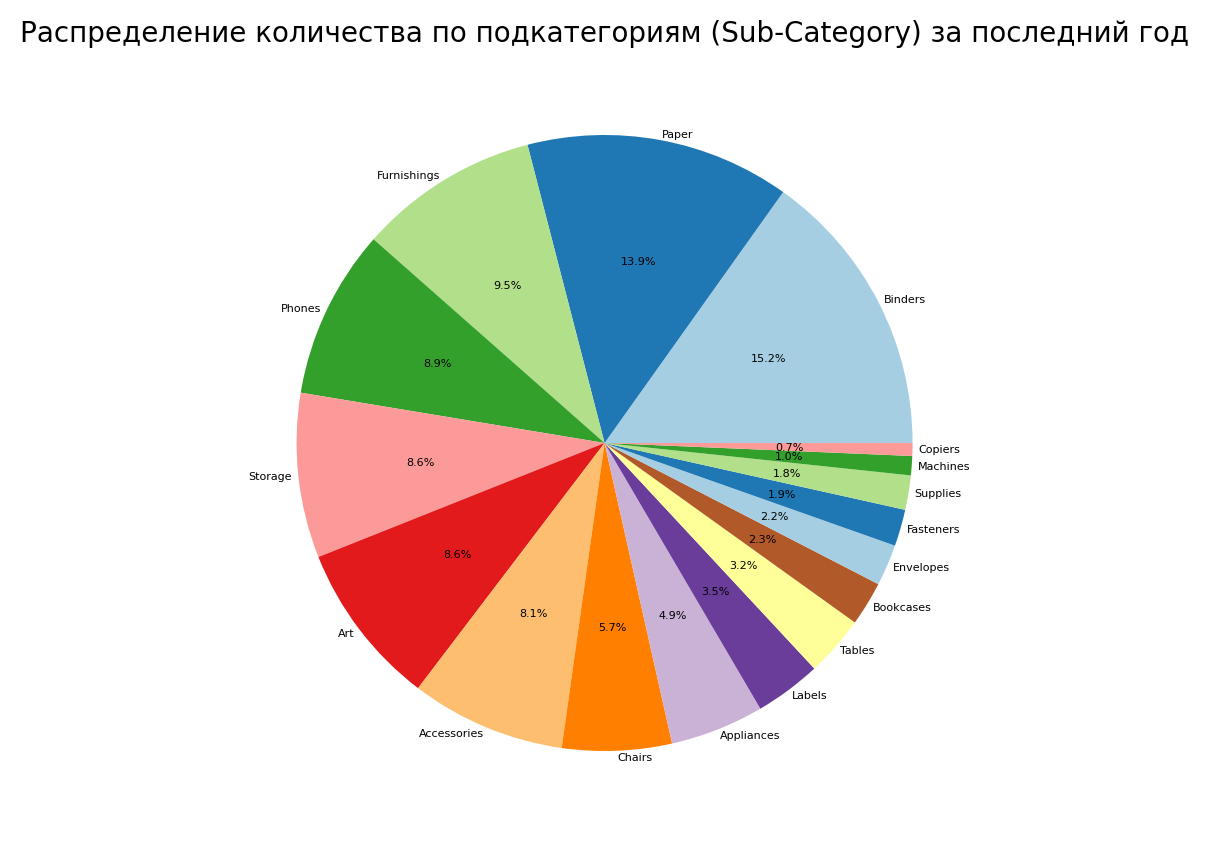

In [207]:
pie_diagram(df_train, 'Sub-Category', 'Order Date', 'Распределение количества по подкатегориям (Sub-Category) за последний год', 1)

In [208]:
top_subcategories_one_years = top_categories_over_time(df_train, 'Sub-Category', 'Order Date', 1)
top_subcategories_one_years

,Top-Category,count,percent
0,Binders,496,15.2
1,Paper,454,13.9
2,Furnishings,310,9.5
3,Phones,291,8.9


# **ИТОГ**
## *Топ 4 категории за последний год это Binders, Paper, Furnishings, Phones*

# **Не относится к тестовому заданию**
*Просто стало интересно какие товары были в топе в каждом году и росли ли категории с каждым годом*




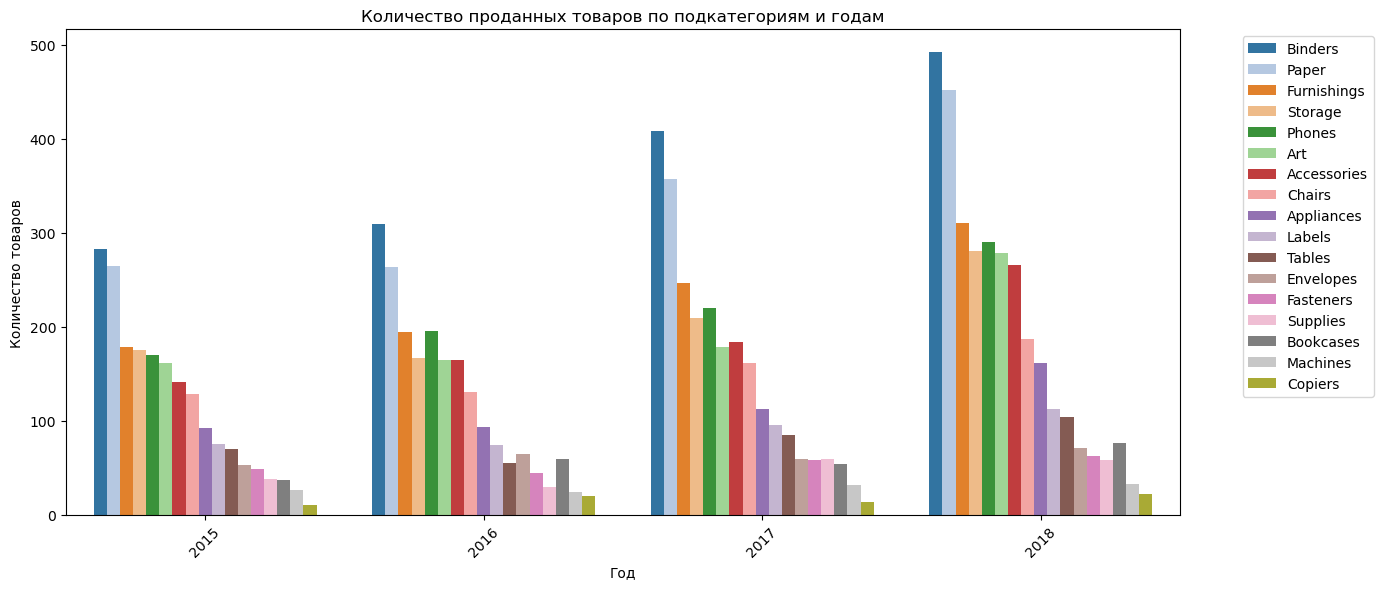

In [209]:

df_train['Year'] = df_train['Order Date'].dt.year

category_sales_per_year = df_train.groupby(['Year', 'Sub-Category']).size().reset_index(name='Count')
category_sales_per_year = category_sales_per_year.sort_values(by=['Year', 'Count'], ascending=[True, False])


plt.figure(figsize=(12, 6))


sns.barplot(x='Year', y='Count', hue='Sub-Category', data=category_sales_per_year, palette='tab20')

plt.title('Количество проданных товаров по подкатегориям и годам')
plt.xlabel('Год')
plt.ylabel('Количество товаров')
plt.xticks(rotation=45)
plt.tight_layout()


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

## **ИТОГ**


*Из этого графика можно прооследить лидеров, которые деражт позиции на протяжении 4-х лет. Еще можно увидеть, что количество товаров с каждым годом растет*

# **Построить boxplot на основе продаж (Sales).Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).Можно использовать правило трех сигм.**

([<matplotlib.axis.YTick at 0x1762c7690>,
 [Text(0, 1002.794, '1003'),
  Text(0, 8002.794, '8003'),
  Text(0, 15002.794, '15003'),
  Text(0, 22002.794, '22003'),
  Text(0, 29002.794, '29003'),
  Text(0, 36002.794, '36003'),
  Text(0, 43002.794, '43003'),
  Text(0, 50002.794, '50003')])

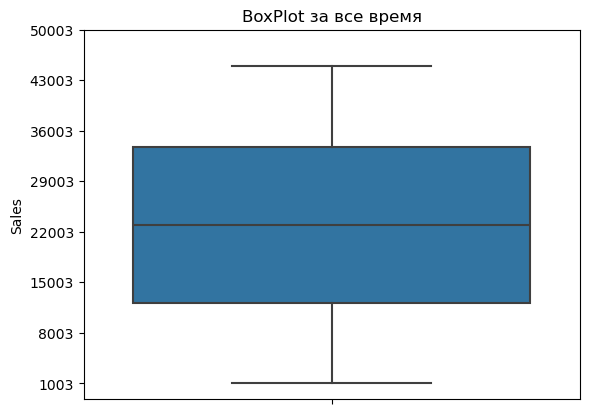

In [210]:
mean_sales = df_train['Sales'].mean()
std_sales = df_train['Sales'].std()

#Правило 3-х сигм
filtered_sales = df_train[(df_train['Sales'] >= (mean_sales - 3 * std_sales)) & (df_train['Sales'] <= (mean_sales + 3 * std_sales))]

min_sales = filtered_sales['Sales'].min()
max_sales = filtered_sales['Sales'].max()
step = 7000
sns.boxplot(data=filtered_sales, y='Sales')

plt.title('BoxPlot за все время')
plt.yticks(np.arange(min_sales, max_sales + step, step))


# **Не относится к тестовому заданию**
## *Покрутил данные с разных сторон*

Text(0, 0.5, 'Средняя прибыль')

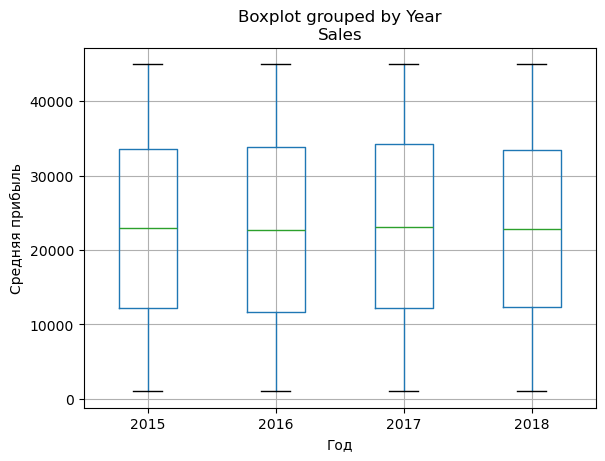

In [211]:
filtered_sales.boxplot(column='Sales', by='Year')
plt.xlabel('Год')
plt.ylabel('Средняя прибыль')

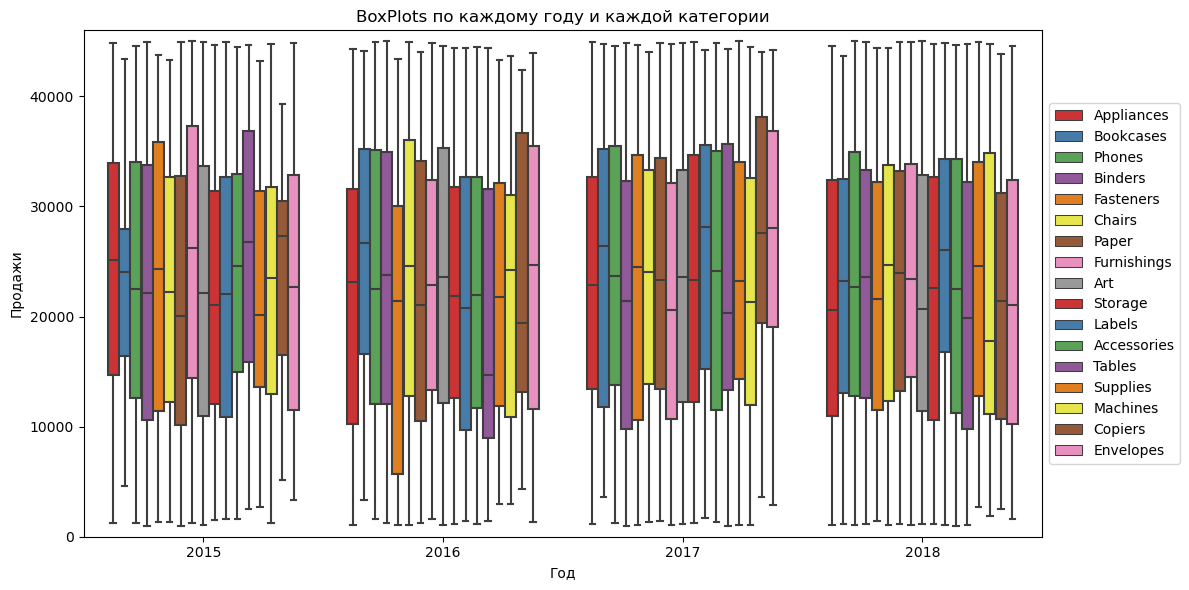

In [212]:

plt.figure(figsize=(12, 6))

sns.boxplot(x='Year', y='Sales', data=filtered_sales, hue='Sub-Category', palette='Set1')


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.ylim(bottom=0)  
plt.ylim(top=46000)  
plt.title('BoxPlots по каждому году и каждой категории')
plt.tight_layout()

# Интересно стало найти какие товары сколько прибыли принесили в каждом году

In [213]:
result = filtered_sales.groupby(['Year', 'Sub-Category'])['Sales'].sum().reset_index()
result = result.sort_values(by=['Year', 'Sales'], ascending=[True, False])
result = result.rename(columns={'Sales':'Profit'})
result['Profit'] = result['Profit'].apply(lambda price: price / 1_000_000)
result

,Year,Sub-Category,Profit
3,2015,Binders,6.365728
12,2015,Paper,5.737633
9,2015,Furnishings,4.572432
14,2015,Storage,3.875575
13,2015,Phones,3.818181
...,...,...,...
58,2018,Envelopes,1.548950
59,2018,Fasteners,1.376410
66,2018,Supplies,1.353534
62,2018,Machines,0.706689


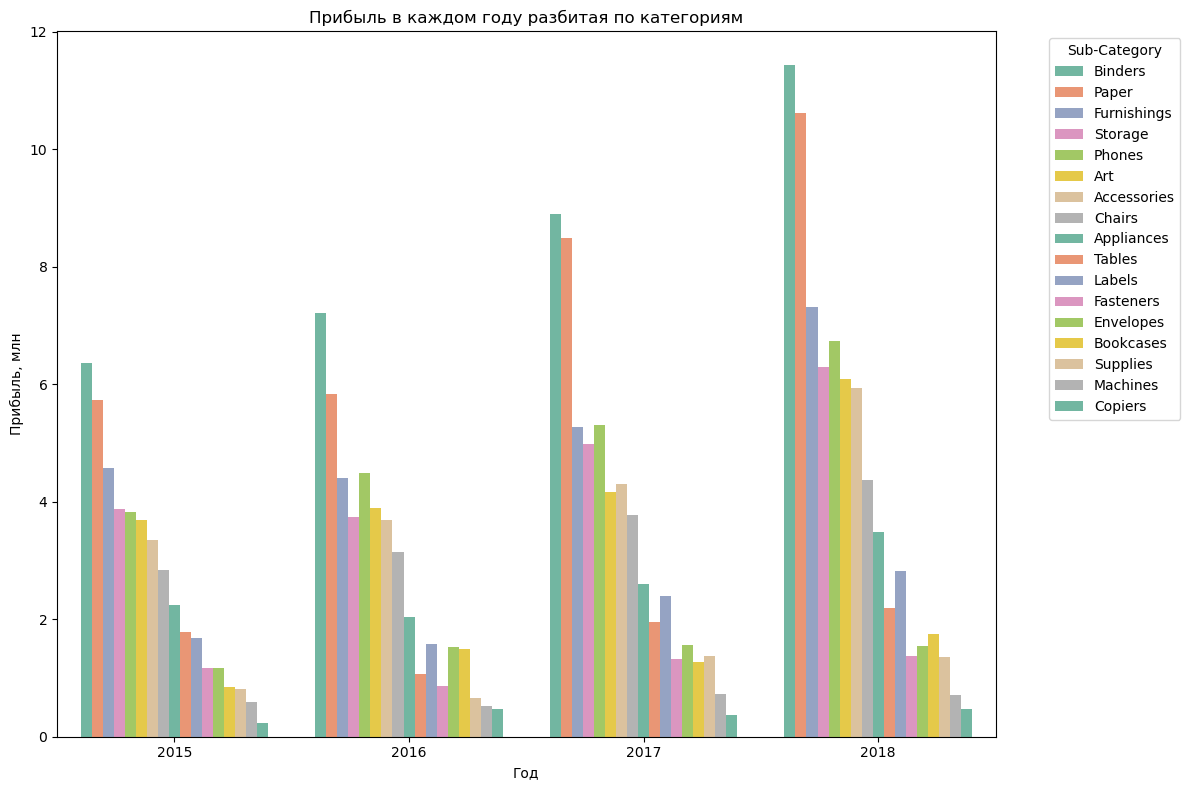

In [214]:
plt.figure(figsize=(12, 8))


barplot = sns.barplot(data=result, x='Year', y='Profit', hue='Sub-Category', palette='Set2', estimator=sum)


plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.title('Прибыль в каждом году разбитая по категориям')
plt.xlabel('Год')
plt.ylabel('Прибыль, млн')


plt.tight_layout()


Text(0, 0.5, 'Суммарная прибыль')

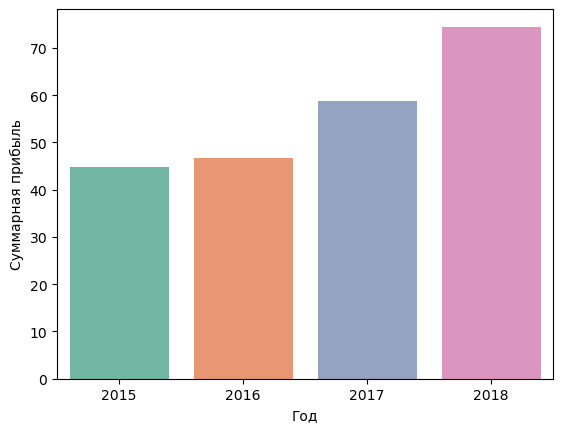

In [215]:
sum_sales = filtered_sales.groupby(['Year'])['Sales'].sum().reset_index()
sum_sales = sum_sales.rename(columns={'Sales':'Sum'})
sum_sales['Sum'] = sum_sales['Sum'].apply(lambda x: x / 1_000_000)
sns.barplot(data=sum_sales, x='Year', y='Sum', palette='Set2')
plt.xlabel('Год')
plt.ylabel('Суммарная прибыль')

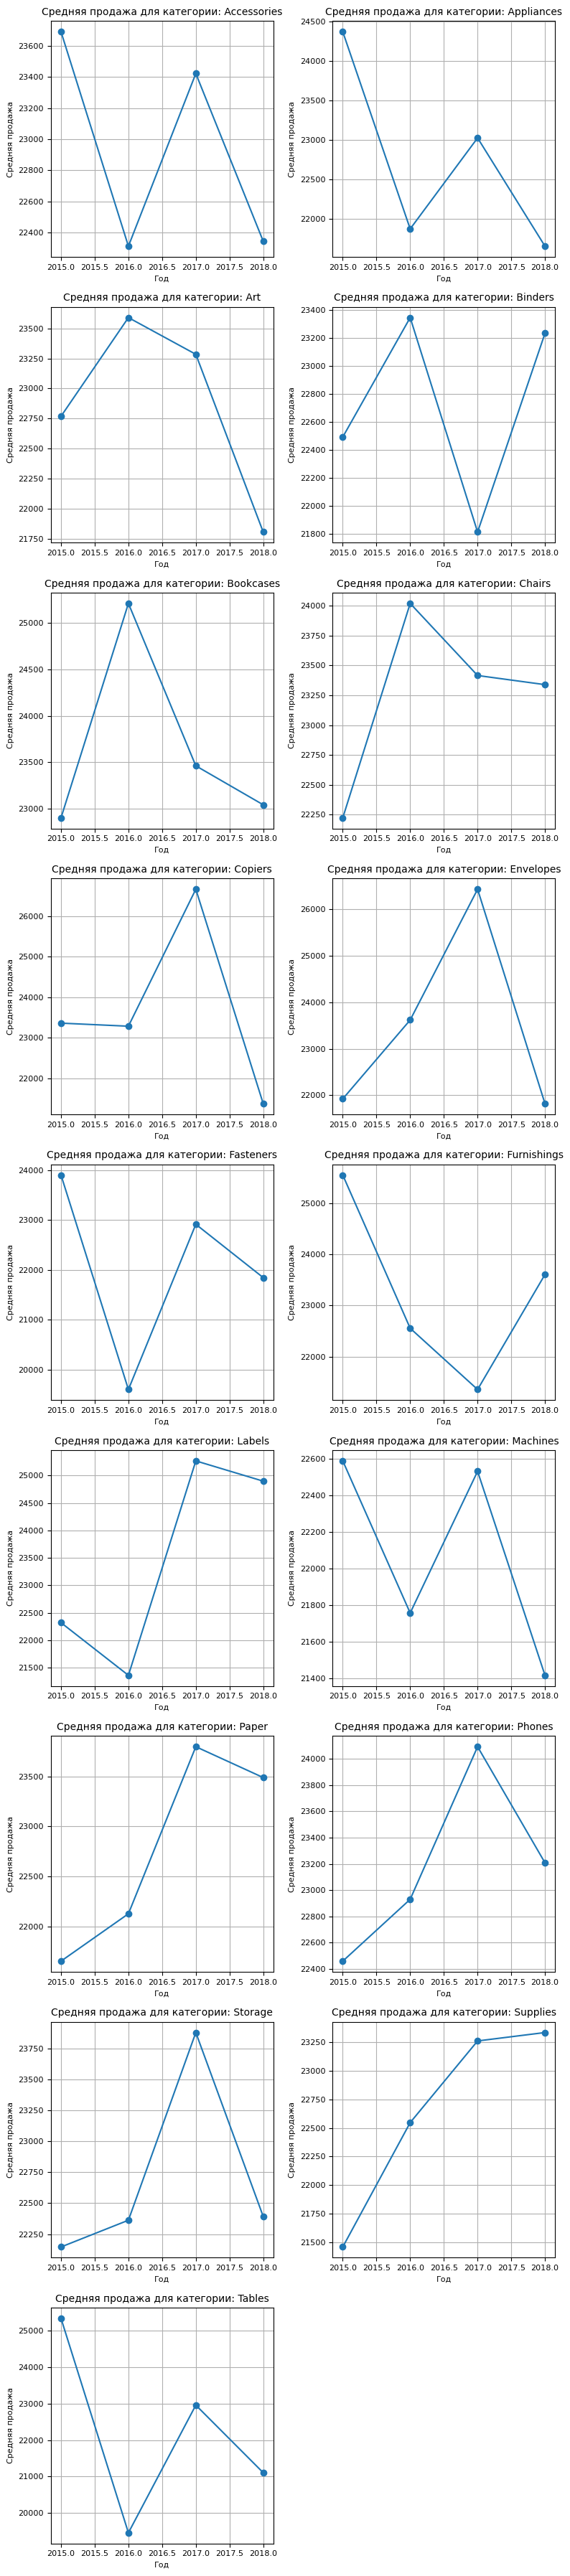

In [216]:
import matplotlib.pyplot as plt

grouped_df = filtered_sales.groupby(['Year', 'Sub-Category'])['Sales'].mean().reset_index()


num_categories = len(grouped_df['Sub-Category'].unique())
ncols = 2  # Количество столбцов
nrows = (num_categories + ncols - 1) // ncols  

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 4 * nrows)) 


for ax in axes.flat[num_categories:]:
    ax.remove()

for ax, category in zip(axes.flat, grouped_df['Sub-Category'].unique()):
    category_data = grouped_df[grouped_df['Sub-Category'] == category]
    ax.plot(category_data['Year'], category_data['Sales'], marker='o', linestyle='-')
    ax.set_title(f'Средняя продажа для категории: {category}', fontsize=10)  
    ax.set_xlabel('Год', fontsize=8)  
    ax.set_ylabel('Средняя продажа', fontsize=8) 
    ax.tick_params(axis='both', which='major', labelsize=8)  
    ax.grid(True)

plt.tight_layout()
plt.show()


# **Итог**
## *Прибыль компании каждый год растет, количество проданных товаров растет, при этом цена за товары держится в одном ценовом сегменте*

# **Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.**

Провел ABC анализ. 80% - Большие продажи, 15% - средние, 5% - маленькие

In [217]:
# Функция для проведения ABC-анализа
def abc_analysis(df, region):
    df_region = df[df['Region'] == region].copy()
    df_region = df_region.sort_values('Sales', ascending=False)
    
    # Расчет накопленных процентов
    df_region['Cumulative Sales'] = df_region['Sales'].cumsum()
    df_region['Cumulative Percentage'] = df_region['Cumulative Sales'] / df_region['Sales'].sum() * 100
    
    # Классификация по принципу ABC
    def classify(row):
        if row['Cumulative Percentage'] <= 80:
            return 'Large'   
        elif row['Cumulative Percentage'] <= 95:
            return 'Medium'  
        else:
            return 'Small'  
    
    df_region['Category'] = df_region.apply(classify, axis=1)
    return df_region

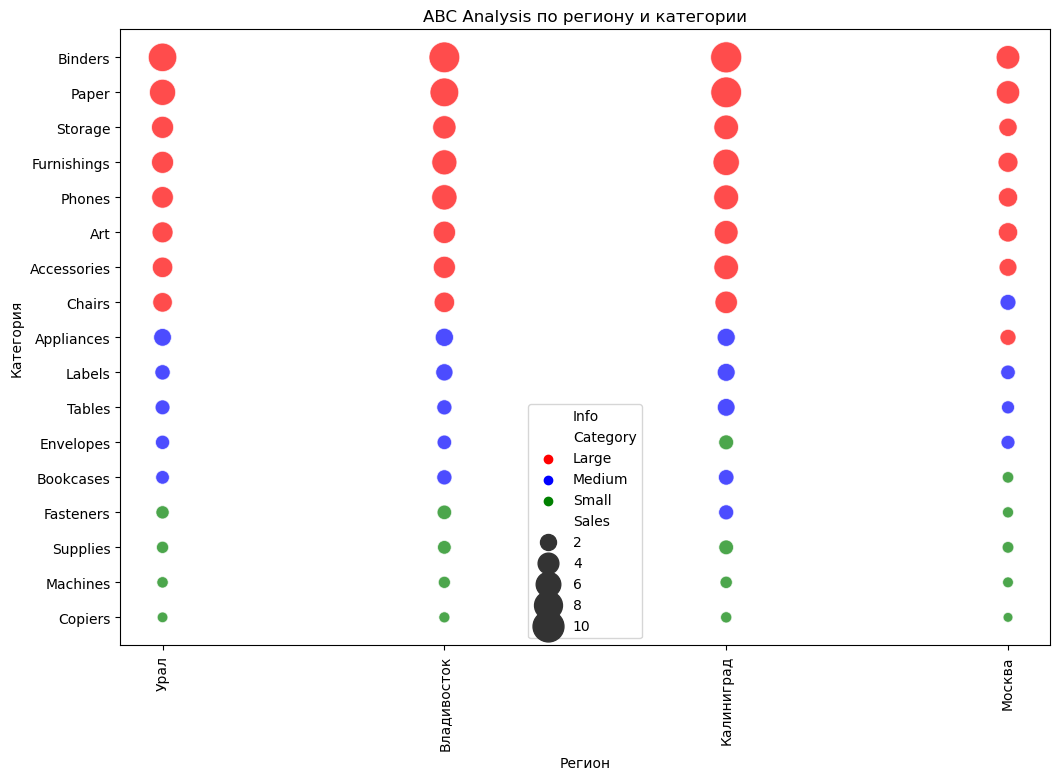

In [221]:
region_sales = filtered_sales.groupby(['Region', 'Sub-Category'])['Sales'].sum().reset_index()

# Применяем анализ для каждого региона
regions = filtered_sales['Region'].unique()
abc_results = pd.concat([abc_analysis(region_sales, region) for region in regions])
abc_results['Sales'] = abc_results['Sales'].apply(lambda x: x / 1_000_000) # перевод в млн

plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=abc_results,
    x='Region',               
    y='Sub-Category',        
    hue='Category',          
    size='Sales',            
    sizes=(50, 500),         
    palette={'Large': 'red', 'Medium': 'blue', 'Small': 'green'},  
    alpha=0.7                 
)

plt.title('ABC Analysis по региону и категории')
plt.xlabel('Регион')
plt.ylabel('Категория')
plt.xticks(rotation=90)
plt.legend(title="Info")
plt.show()

# **График иллюстрирует объем продаж в каждом регионе**

In [219]:
region_sales = filtered_sales.groupby('Region')['Sales'].sum().reset_index()


region_sales = region_sales.sort_values(by='Sales', ascending=False)

region_sales['Sales'] = region_sales['Sales'].apply(lambda x: x / 1_000_000)
region_sales = region_sales.rename(columns={'Sales':'Profit'})
region_sales

,Region,Profit
1,Калиниград,71.930300
0,Владивосток,63.952687
3,Урал,51.858588
2,Москва,36.891652


Text(0, 0.5, 'Регион')

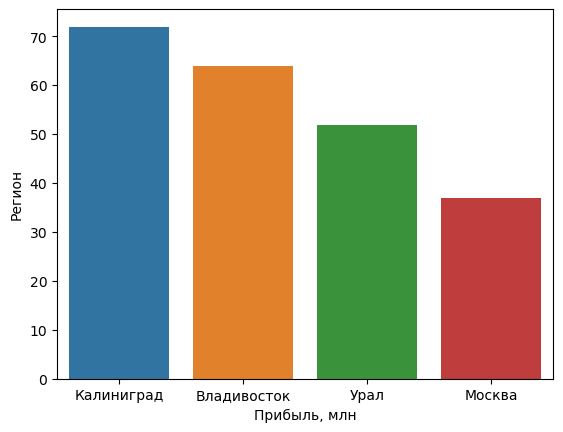

In [220]:
sns.barplot(data=region_sales, x='Region', y='Profit', estimator='sum')

plt.xlabel('Прибыль, млн')
plt.ylabel('Регион')

# **Спасибо за внимание!**
## *Если все понравилось - мой тг @bl3sk_soul для связи*